In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-ranking/POP.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/population-ranking/POP.csv')

In [4]:
df.head()

,IND,1,India,"1,417,173",Unnamed: 4
0,CHN,2,China,"1,412,175",NaN
1,USA,3,United States,"333,288",NaN
2,IDN,4,Indonesia,"275,501",NaN
3,PAK,5,Pakistan,"235,825",NaN
4,NGA,6,Nigeria,"218,541",NaN


# **Data Cleaning and Preprocessing**

In [5]:
# Rename the columns
new_titles = ['Country_Code', 'Number', 'Country_Name', 'Population', 'Other']
df.columns = new_titles

In [6]:
# Replace null values with 'NA'
for col in ['Country_Code', 'Country_Name']:
    df[col] = df[col].fillna('NA')
    
# Replace null values with -1 for 'Population'
df['Population'] = df['Population'].fillna(-1)

In [7]:
# Drop the 'Other' and 'Number' columns, and remove duplicates
df = df.drop('Other', axis=1)
df = df.drop('Number', axis=1)
df = df.drop_duplicates()

In [8]:
# Add a new row with India's population data
new_row = pd.DataFrame({'Country_Code': ['IND'], 'Country_Name': ['India'], 'Population': ['1,417,173']})
df = pd.concat([df, new_row], ignore_index=True)

In [9]:
# Clean the Population column
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

In [10]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=0)

# Data Visualization


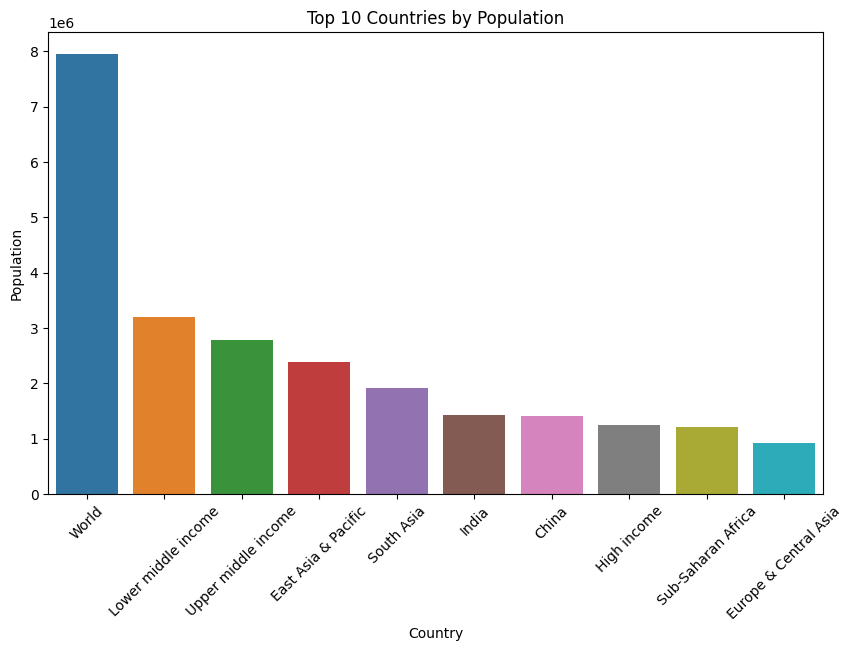

In [11]:
# Bar chart for top 10 countries by population
top10 = df.nlargest(10, 'Population')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country_Name', y='Population', data=top10)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')
plt.show()

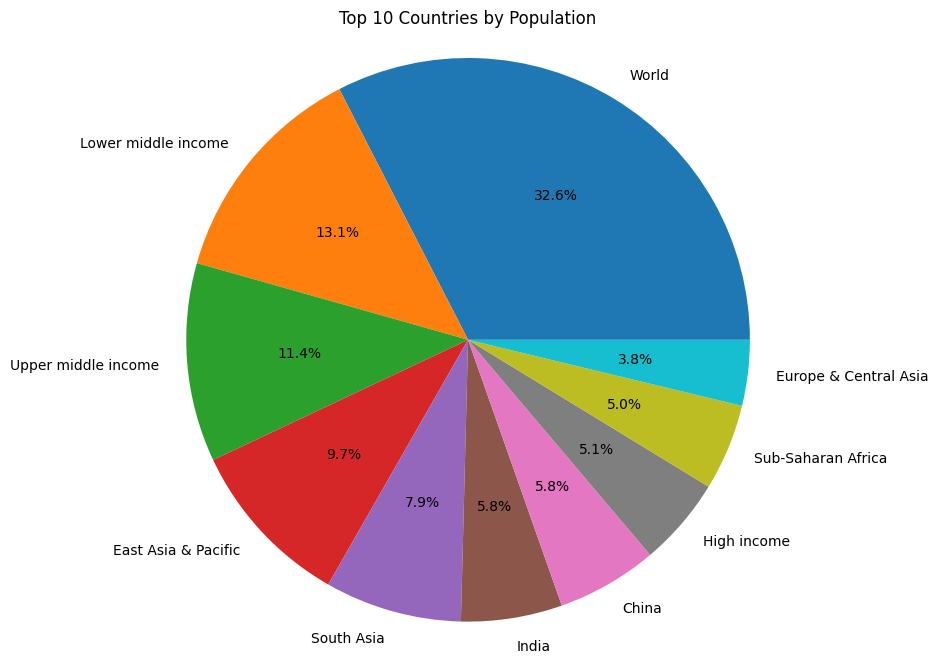

In [12]:
# Pie chart for top 10 countries by population
top10_pop = top10['Population'].values
top10_countries = top10['Country_Name'].values
plt.figure(figsize=(8, 8))
plt.pie(top10_pop, labels=top10_countries, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 10 Countries by Population')
plt.show()